Dataset Preview:
   OrderID       Date Customer   Price  Quantity  Discount
0     1051 2023-01-01    CUST9  3957.0       6.0      37.0
1     1092 2023-01-02   CUST37   684.0       3.0      63.0
2     1014 2023-01-03   CUST33  3075.0       4.0      37.0
3     1071 2023-01-04   CUST42  4241.0       6.0      49.0
4     1060 2023-01-05   CUST44  2706.0      11.0      29.0 

 Data Quality Report:
                 Issue  Count  Percentage
0       Missing Values     15         7.5
1      Negative Values     44        22.0
2  Duplicate Order IDs    113        56.5
3             Outliers      7         3.5
4  Discount Violations     52        26.0 

 Overall Data Quality Score: -15.50% records passed all checks



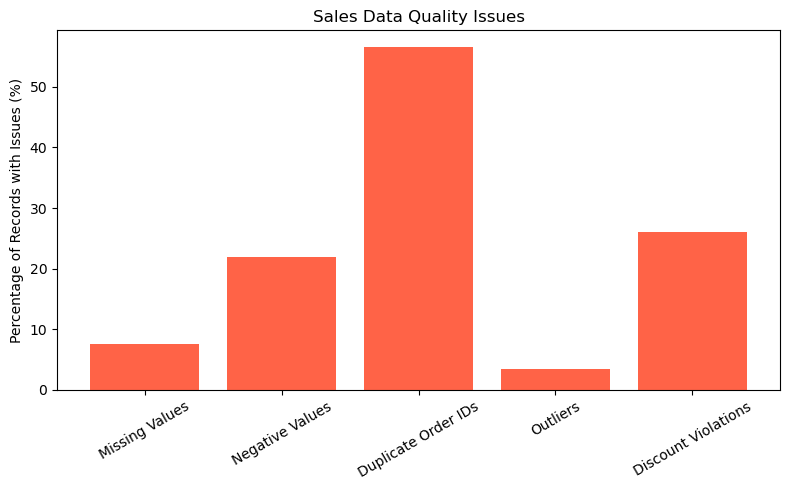

 Quality report chart saved as 'quality_report.png'


In [2]:
"""
Sales Data Quality Checks with Python
Project Overview:
This project simulates an E-commerce Sales dataset and performs Data Quality Analysis (DQA)
to ensure the dataset meets business standards.

Goals:
- Identify missing values, invalid records, duplicates, and outliers.
- Apply business rules (e.g., discount ≤ 50%).
- Generate a quality report for decision-making.

"""

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Simulate Dataset

np.random.seed(42)
num_records = 200

data = {
    "OrderID": np.random.randint(1000, 1100, size=num_records),  # may create duplicates
    "Date": pd.date_range(start="2023-01-01", periods=num_records, freq="D"),
    "Customer": [f"CUST{np.random.randint(1, 51)}" for _ in range(num_records)],
    "Price": np.random.randint(-100, 5000, size=num_records),  # includes negatives
    "Quantity": np.random.randint(-5, 20, size=num_records),   # includes negatives
    "Discount": np.random.randint(0, 70, size=num_records),    # some >50%
}

df = pd.DataFrame(data)

# Introduce missing values
for col in ["Price", "Quantity", "Discount"]:
    df.loc[np.random.choice(df.index, 5, replace=False), col] = np.nan

print("Dataset Preview:")
print(df.head(), "\n")

#  Data Quality Checks

quality_issues = {}

# Missing Values
missing_values = df.isnull().sum().sum()
quality_issues["Missing Values"] = missing_values

# Negative Values
negatives = df[(df["Price"] < 0) | (df["Quantity"] < 0)].shape[0]
quality_issues["Negative Values"] = negatives

# Duplicate Order IDs
duplicate_ids = df["OrderID"].duplicated().sum()
quality_issues["Duplicate Order IDs"] = duplicate_ids

# Sales Amount
df["SalesAmount"] = df["Price"].fillna(0) * df["Quantity"].fillna(0) * (1 - df["Discount"].fillna(0) / 100)

# Outliers in Sales Amount
q1, q3 = np.percentile(df["SalesAmount"], [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
outliers = df[(df["SalesAmount"] < lower) | (df["SalesAmount"] > upper)].shape[0]
quality_issues["Outliers"] = outliers

# Discount Violations (>50%)
discount_violations = df[df["Discount"] > 50].shape[0]
quality_issues["Discount Violations"] = discount_violations

#  Quality Report
total_records = df.shape[0]
report = pd.DataFrame([
    {"Issue": issue, "Count": count, "Percentage": (count/total_records)*100}
    for issue, count in quality_issues.items()
])

print(" Data Quality Report:")
print(report, "\n")

# Overall Data Quality Score
passed_records = total_records - sum(quality_issues.values())
overall_quality = (passed_records / total_records) * 100
print(f" Overall Data Quality Score: {overall_quality:.2f}% records passed all checks\n")

#  Visualization
plt.figure(figsize=(8, 5))
plt.bar(report["Issue"], report["Percentage"], color="tomato")
plt.ylabel("Percentage of Records with Issues (%)")
plt.title("Sales Data Quality Issues")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("quality_report.png")  # save chart as image
plt.show()

print(" Quality report chart saved as 'quality_report.png'")
